<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwe.png" width=300>
<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwecyber_acecse_200.jpg" width=300>

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Task 3: Insider Threat Detection (2021)
---

The completion of this worksheet is worth **40%** towards your portfolio for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Task
---

In this task, you have been asked to investigate a potential security threat within an organisation. Building on your previous worksheet expertise, you will need to apply your skills and knowledge of data analytics and visualisation to examine and explore the datasets methodically to uncover which employee is acting as a threat and why. The company have provided you with activity logs for various user interactions for the past 6 months, resulting in a lot of data that they need your expertise for to decipher. They want to have a report that details the investigation that you have carried out, details of the suspected individual, and a clear rationale as to why this suspect is flagged. You will need to document your investigation, giving clear justification for your process using Markdown annotation within your notebook. You will need to provide a clear rationale for why you suspect a given individual to be acting as a threat, based on the pattern of activity that you identify.

<i>This coursework is specifically designed to challenge your critical thinking and creativity, and is designed as an open problem. Examine the data and try to think how an individual user may appear as an anomaly against the remainder of the data. This could be an anomaly compared to a group of users, or an anomaly as compared over time.</i>


### Assessment and Marking
---

| Criteria | 0-39 | 40-49 | 50-59 | 60-69 | 70-84 | 85-100 |
| --- | --- | --- | --- | --- | --- | --- |
| **Identification of the suspicious activity (30%)** | No evidence of progress | A limited attempt to address this criteria | A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Analytical process and reasoning (30%)**  | No evidence of progress | A limited attempt to address this criteria |  A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Visualisation techniques (20%)**  | No evidence of progress | A limited attempt to address this criteria |  A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Clarity and professional presentation (20%)**  | No evidence of progress | A limited attempt to address this criteria | Some evidence of markdown commentary | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |

To achieve the higher end of the grade scale, you need to demonstrate creativity in how you approach the problem of identifying malicious behaviours, and ensure that you have accounted for multiple anomalies across the set of data available.

You will need to implement your final solution in the Notebook format, with Markdown annotation -  you should use this notebook file as a template for your submission. You are also expected to complete the assignment self-assessment.

Your submission should include:
- HTML export of your complete assignment in notebook format.
- Original ipynb source file of your notebook.

### Self-Assessment
---

For each criteria, please reflect on the marking rubric and indicate what grade you would expect to receive for the work that you are submitting. For your own personal development and learning, it is important to reflect on your work and to attempt to assess this careful. Do think carefully about both positive aspects of your work, as well as any limitations you may have faced.

- **Identification of the suspicious activity (30%)**: You estimate that your grade will be 100.

- **Analytical process and reasoning (30%)**: You estimate that your grade will be 100.

- **Visualisation techniques (20%)**: You estimate that your grade will be 100.

- **Clarity and professional presentation (20%)**: You estimate that your grade will be 100.

Please provide a minimum of two sentences to comment and reflect on your own self-assessment: I found this task very hard to begin. I felt that I knew which types of graphs I would like to make but didn't understand the libraries enough to create them. After a few weeks of getting to grips with the libraries I felt that I could make the graphs I wanted to. At this stage progression considerably sped up. I believe that I have identified all the anomolies within the dataset, as well as covering non-anomolous data.
My approach would be to look at the entire data set, this being within each department per month, this would show general trends and outliers would become clear. Once an outlier was identified it would be dug down further to realise the root cause of the anomoly, this would then be checked against the remaining dataset to ensure that it was accurate.
I think that I have used a range of visualisation techniques to accurately display the data. For example, I had initally used line graphs for access times, however, this gives the impression that the data has a duration, this is unknown, thus using a scatter to show when the data was created gives a clearer representation.

### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---


## Loading in the data

In [1]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime
import warnings
warnings.filterwarnings("ignore")
dataset_list = ['lockdown-lockups', 'onlinebargains', 'trackntrace', 'zoooom']
DATASET = dataset_list[1]
def load_data(DATASET):
    if DATASET in dataset_list:
        email_data = pd.read_csv('./T3_data/' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./T3_data/' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./T3_data/' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./T3_data/' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./T3_data/' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./T3_data/' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined - please refer to Blackboard for DATASET name")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)

# Pre-Processing

In [2]:
user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)
    
## Anomolous Data Identifiers
anomMonth = "August"
anomRole = "Director"
anomFile = "/docs/clients"
anomUser = "usr-rhd"
anomTarget= "usr-xpo"
anomSite1 = "http://www.linkedin.com"
anomSite2 = "http://www.legaleagle.com"

### Employee Data processing
EmployeeBar = pd.value_counts(employee_data['role'])           #Save counts to plot departments

### USB Data processing
usbUser = usb_data[usb_data['user'].isin(user_set[anomRole])]  #Filter down to the anomolous role                                    
usbUser['month'] = usbUser['datetime'].dt.month_name()         #Create a new column for months
usbUser = usbUser[usbUser['month']== anomMonth]                #Filter down to the identified month
usbUser['hour'] = usbUser['datetime'].dt.hour                  #Filter down to hours for plotting
usbUserBar = pd.value_counts(usbUser['user'])                  #Save action counts for a bar chart
usbUserScat = usbUser[usbUser['action']== 'usb_insert']        #Save usb_inserts for a scatter chart

### File Data processing
fileFilter = file_data[file_data['user'].isin(user_set[anomRole])] #Filter down to the anomolous role 
fileFilter['month'] = fileFilter['datetime'].dt.month_name()       #Create a new column for months
fileFilter = fileFilter[fileFilter['month']== anomMonth]           #Filter down to the identified month
fileBar = pd.value_counts(fileFilter['filename'])                  #Save access counts for a bar chart
fileUser = fileFilter[fileFilter['filename']==anomFile]            #Filter down to the anomolous file
fileUser['hour'] =fileUser['datetime'].dt.hour                     #Filter down to hours for plotting
fileUserBar = pd.value_counts(fileUser['user'])                    #Save access counts for a specific users bar chart
#fileUserLine = fileUser.groupby(fileUser['hour']).count()

### Web Data processing
webFilter = web_data[web_data['user'].isin(user_set[anomRole])]   #Filter down to the anomolous role 
webFilter['month'] = webFilter['datetime'].dt.month_name()        #Create a new column for months
webFilter = webFilter[webFilter['month']== anomMonth]             #Filter down to the identified month
webBar = pd.value_counts(webFilter['website'])                    #Save site visit counts for a bar chart
webFilter['hour'] =webFilter['datetime'].dt.hour                  #Filter down to hours for plotting
webUser1 = webFilter[webFilter['website']==anomSite1]             #Filter down to anomolous site 1 for scattering
webUser2 = webFilter[webFilter['website']==anomSite2]             #Filter down to anomolous site 2 for scattering
webUserBar1 = pd.value_counts(webUser1['user'])                   #Save site visit counts for a bar chart
webUserBar2 = pd.value_counts(webUser2['user'])                   #Save site visit counts for a bar chart

### Email Data processing
emailFilter = email_data[email_data['sender']==anomUser+'@'+DATASET+'.com']       #Filter down to the anomolous user 
emailFilter['month'] = emailFilter['datetime'].dt.month_name()                    #Create a new column for months
emailFilter = emailFilter[emailFilter['month']==anomMonth]                        #Filter down to the identified month
emailBar = pd.value_counts(emailFilter['recipient'])[:50]                         #Save top 50 email counts for a bar chart
emailUser = emailFilter[emailFilter['recipient']==anomTarget+'@'+DATASET+'.com']  #Filter down to the anomolous target
emailUser['day'] = emailUser['datetime'].dt.day                                   #Filter down to day for plotting
emailUserBar = pd.value_counts(emailUser['day'])                                  #Save emails per day counts for a bar chart

emailFilter2 = email_data[email_data['sender']==anomTarget+'@'+DATASET+'.com']   #Filter down to the anomolous target
emailFilter2['month'] = emailFilter2['datetime'].dt.month_name()                 #Create a new column for months
emailFilter2 = emailFilter2[emailFilter2['month']==anomMonth]                    #Filter down to the identified month
emailBar2 = pd.value_counts(emailFilter2['recipient'])                           #Save email counts for a bar chart

## Employee data overview

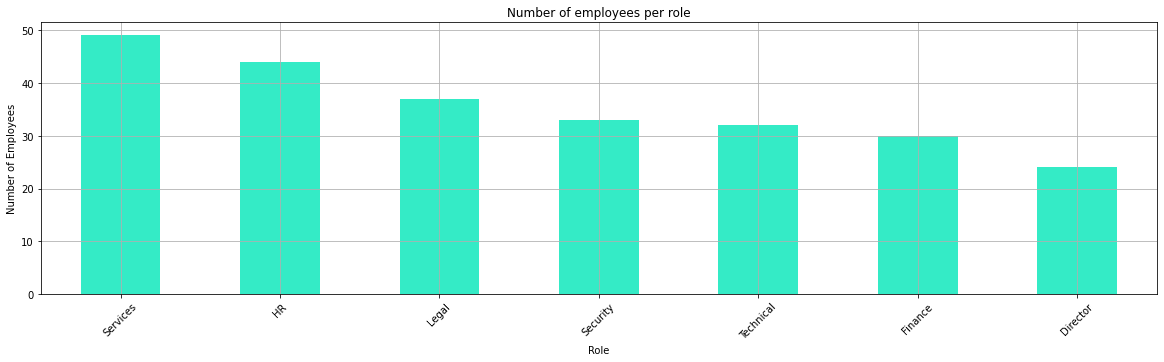

In [3]:
EmployeeBar.plot(kind='bar',title="Number of employees per role",xlabel="Role",ylabel="Number of Employees",
        rot=45,color='#34ebc6', figsize=(20,5)).grid(True)

This graph shows the number of employees per department, this allows for an overview of the company.
## USB data overview

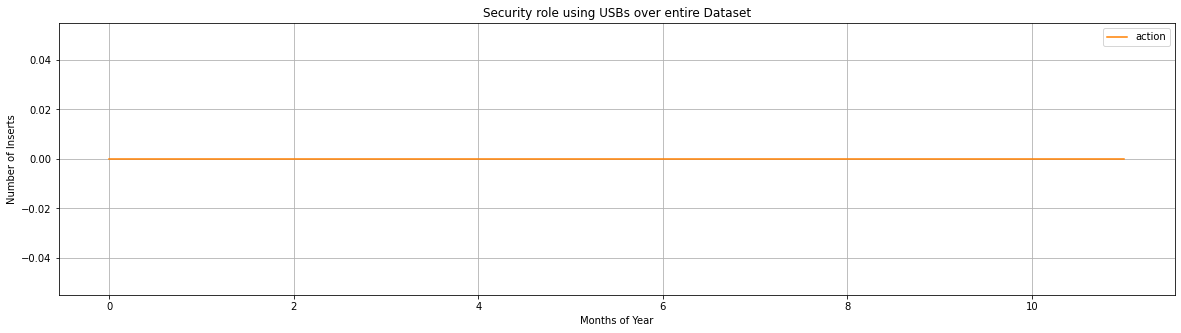

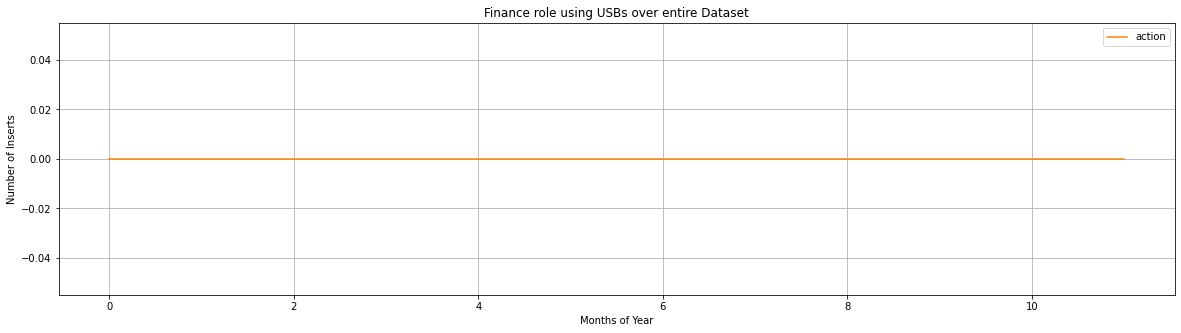

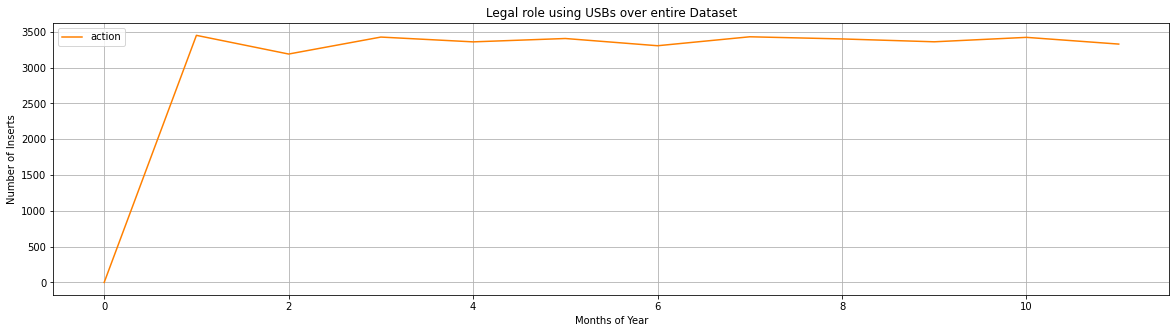

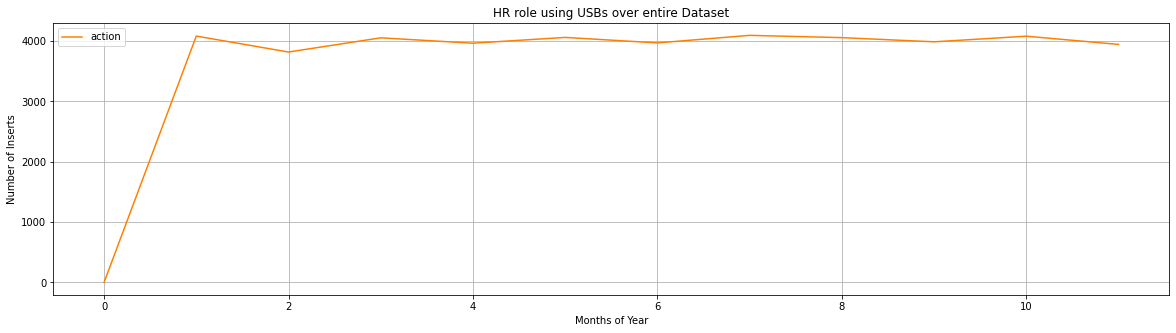

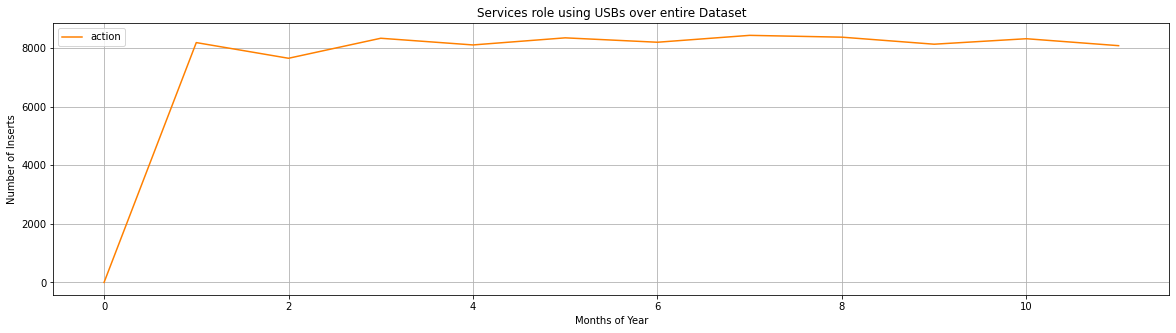

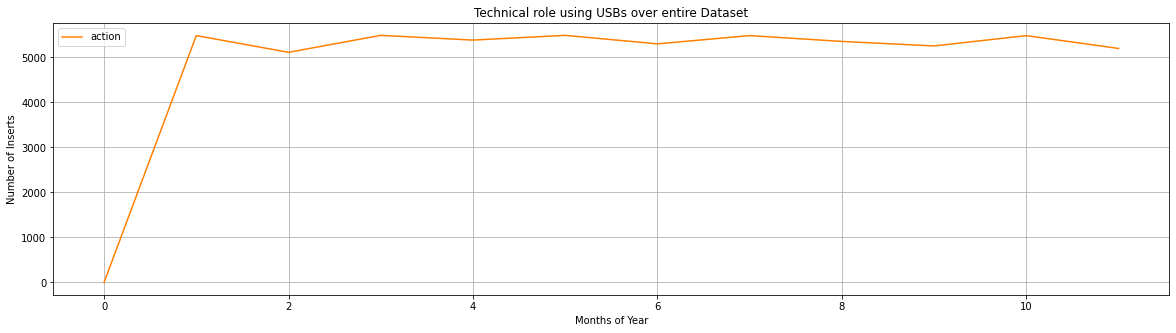

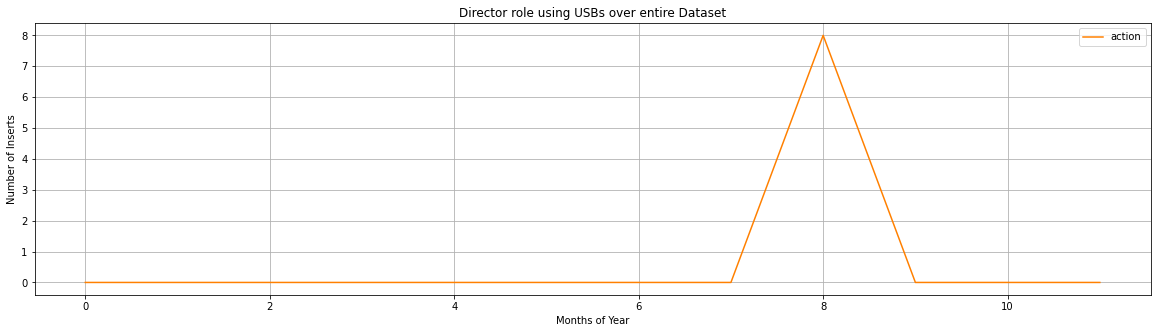

In [4]:
for role in all_roles:
    usbFilter = usb_data[usb_data['user'].isin(user_set[role])]                             
    usbUser= usbFilter
    usbFilter = usbFilter[usbFilter['action'] == 'usb_insert']                                                     
    usbFilter['month'] = usbFilter['datetime'].dt.month
    usbAction = list()
    for i in range(0,12):                                                                    
        usbAction.append([i,0])
    usbLine = pd.DataFrame(usbAction, columns = ['month','action'])                             
    usbLine = usbLine.iloc[: , 1:]    
    for usb in usbFilter['month'].unique():
        action = usbFilter[usbFilter['month'] == int(usb)]
        usbLine['action'][usb] = pd.value_counts(action['action']) 
    usbLine.plot(color='#ff8000', title=f"{role} role using USBs over entire Dataset",xlabel="Months of Year",ylabel="Number of Inserts",figsize=(20,5),rot=0).grid(True)
    plt.show()

This set of graphs show that the Security and Finance roles don't use USBs, Legal, HR, Services and Technical steadily use them and Directors don't use them apart from in the Month of August where they have used them a total of 8 times.
### Users that used USBs

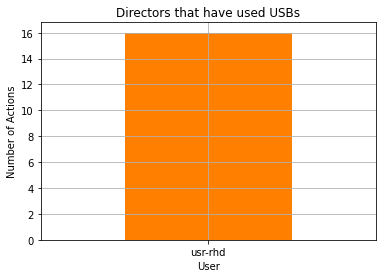

In [5]:
usbUserBar.plot(kind="bar",color='#ff8000', title="Directors that have used USBs",xlabel="User",ylabel="Number of Actions",rot=0).grid(True)

This graph filters the data down further to identify which directors are peforming the USB actions. This shows that it is in fact only 1 user: "usr-rhd". They performed a total of 16 actions, this is equally split between inserts and removes.
### Times of USB usage

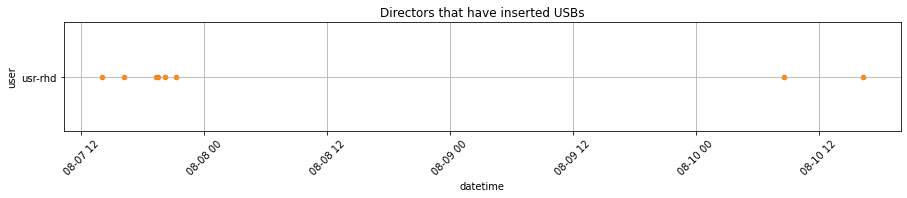

In [6]:
usbUserScat.plot.scatter('datetime','user',marker='o',rot=45,color='#FF8000',title="Directors that have inserted USBs",figsize=(15,2)).grid(True)

This shows that usr-rhd inserted a USB multiple times between 2020-08-07 and 2020-08-10. The majority of these occurences were in the afternoon of the 7th.
### USB data conclusion
This was the first starting point to understand what was happening within the data set, starting off by plotting all departments against all months, this allowed for trends within departments to be viewed. In August, within the Directors department, there was an outlier,this being that for the rest of the year, Directors did not use USBs. 
This was then drilled down further to find which Directors specifically had used a USB to which only one user was found being "usr-rhd"
Now that the month of August, the Director role, and a specific user "Usr-rhd" have been identified, the investigation will focus on these criteria.To find whether this user is causing other anomolous data compared to the rest of the data set.
## File data overview

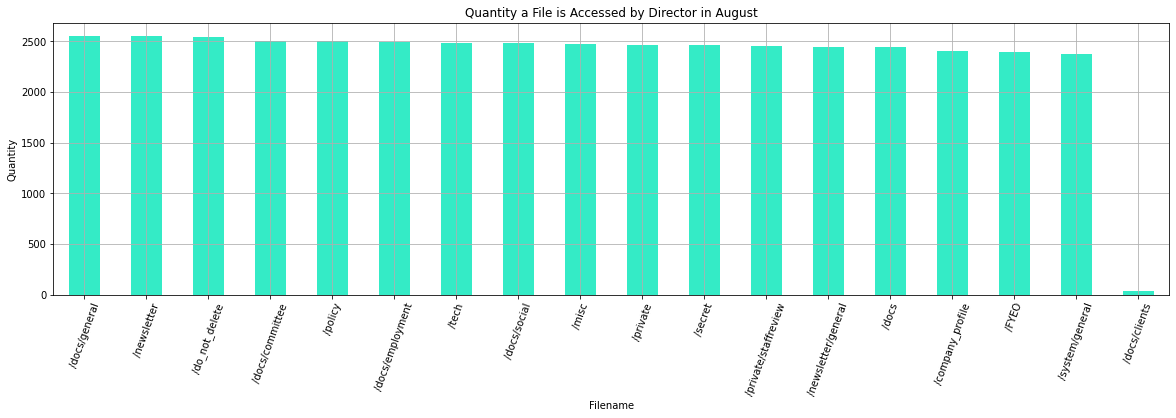

In [7]:
fileBar.plot(kind='bar',title= (f"Quantity a File is Accessed by {role} in {anomMonth}"), xlabel="Filename", ylabel='Quantity', color='#34ebc6', rot=70, figsize=(20,5)).grid(True)

This graph shows the file usage by directors in August, this time a new file "/docs/clients" is being accessed, however, the usage is very low compared to all other files that directors are accessing.
### Users that accessed /docs/clients

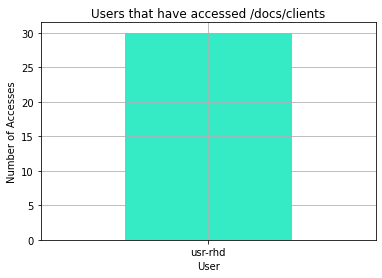

In [8]:
fileUserBar.plot(kind="bar",color='#34ebc6', title="Users that have accessed /docs/clients",xlabel="User",ylabel="Number of Accesses",rot=0).grid(True)

Once again, the data was filtered down to identify which user had been creating the data, and similarly it was the same "usr-rhd". This graph shows that the user accessed the file 30 times over the course of the month.
###  Access times of /docs/clients

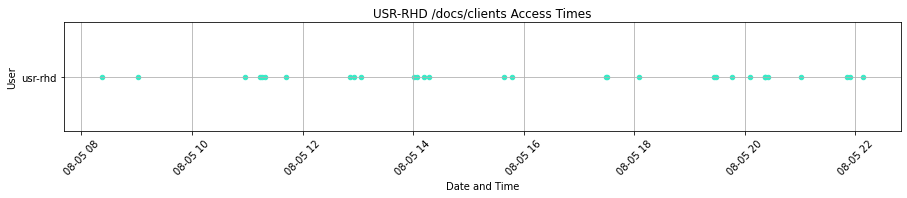

In [9]:
# fileUserLine.plot(kind='line', title = "USR-RHD /docs/clients Access Times",
#                xlabel="Hours", ylabel="Quantity of accesses", linewidth=1, color='#34ebc6',rot=0, figsize=(10,5),legend=None).grid(True)
fileUser.plot.scatter('datetime','user',marker='o',rot=45,color='#34ebc6',title="USR-RHD /docs/clients Access Times",xlabel="Date and Time",ylabel="User",figsize=(15,2)).grid(True)

The access times and number of accesses were then plotted as to see the frequency and the time window in which the user had made use of the file. It can be seen that the file was only accessed in a 24hour window on 2020-08-05. 
### File data conclusion
By plotting the directors file usage in August, it can be seen that one file "/docs/clients" has been accessed a very low number of times in comparison to the rest of the files. This was further investigated to identify the user accessing this file, this was "usr-rhd", their access times were then plotted. This showed that all activity happened within one day.
## Web data overview

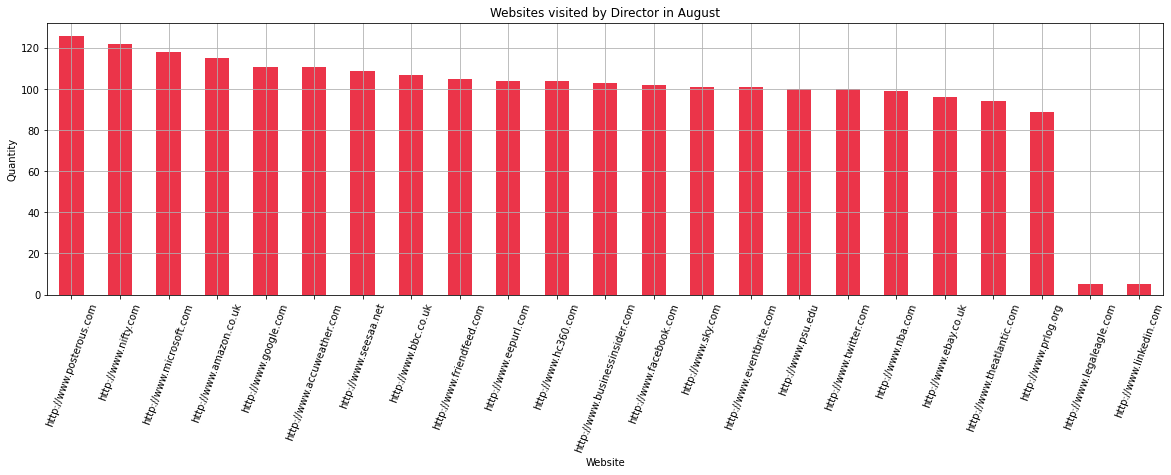

In [10]:
webBar.plot(kind='bar',title= (f"Websites visited by {role} in {anomMonth}"), xlabel="Website", ylabel='Quantity', color='#eb3449', rot=70,figsize=(20,5)).grid(True)

Similarly to the previous categories, web data was plotted through the year for directors, once again, August had anomolous data. This time two new websites had been visited, these being: http://www.legaleagle.com and http://www.linkedin.com.
### Users that visited the new sites

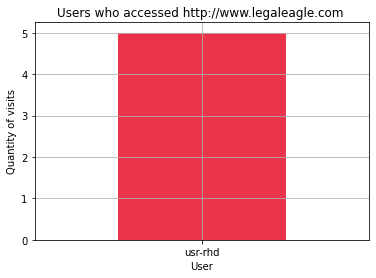

In [11]:
webUserBar1.plot(kind="bar",color='#eb3449', title="Users who accessed http://www.legaleagle.com ",xlabel="User",ylabel="Quantity of visits",
        rot=0,).grid(True)

Again, the data was filtered down to see which Director had created this traffic, similarly it was "usr-rhd", they had accessed http://www.legaleagle.com a total of 5 times in August.

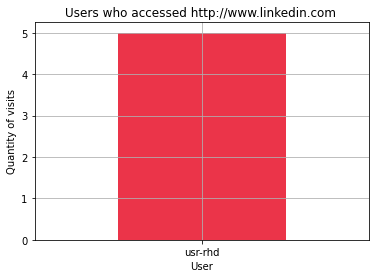

In [12]:
webUserBar2.plot(kind="bar",color='#eb3449', title="Users who accessed http://www.linkedin.com ",xlabel="User",ylabel="Quantity of visits",
        rot=0,).grid(True)

The same could be observed for http://www.linkedin.com the user was "usr-rhd and had accessed it a total of 5 times in August.
### Times when the sites were visited

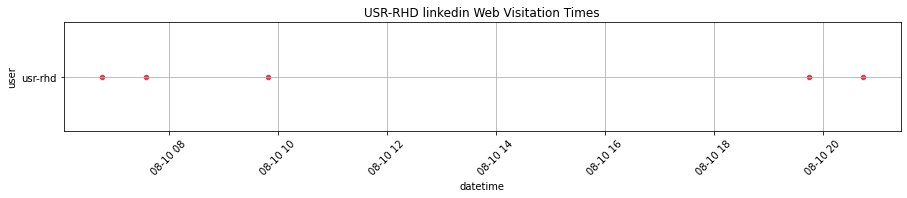

In [13]:
webUser1.plot.scatter('datetime','user',marker='o',rot=45,color='#eb3449',title="USR-RHD linkedin Web Visitation Times",figsize=(15,2)).grid(True)

Once more, the user data was plotted as to visualise when they accessed the site, this shows that it again happened all in the same day of 2020-08-10.

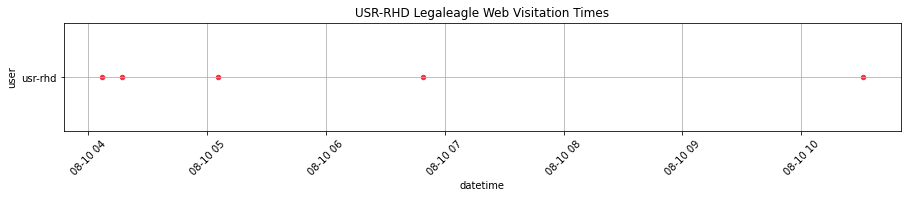

In [14]:
webUser2.plot.scatter('datetime','user',marker='o',rot=45,color='#eb3449',title="USR-RHD Legaleagle Web Visitation Times",figsize=(15,2)).grid(True)

As to be expected, the user only accessed the site on 2020-08-10, here a more even distribution of one visit every few hours.
### Web data conclusion
With the trend of anomolous data within the Director role and August, it was easy to identify further anomolous data but this time within the web data, it could be seen that two websites had been accessed for the first time and once again by "usr-rhd". This web activity occured on the same date as previous incidents. These two new sites were http://www.legaleagle.com and http://www.linkedin.com.
## Email data overview

<AxesSubplot:title={'center':'Top 50 email recipients of usr-rhd@onlinebargains.com in August'}, xlabel='Recipient', ylabel='Quantity of emails'>

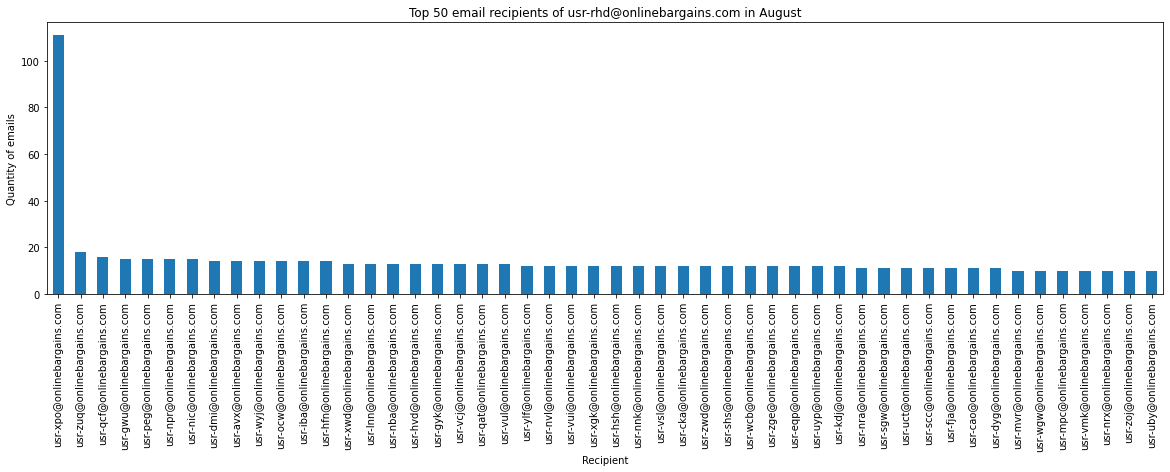

In [15]:
emailBar.plot(kind='bar', figsize=(20,5),title = f"Top 50 email recipients of usr-rhd@onlinebargains.com in {anomMonth}",
               xlabel="Recipient", ylabel="Quantity of emails")

The email data was filtered down to the user in the identified month. This user sent many emails across the entire organisation, however, there is a clear spike in sent mail to "usr-xpo@onlinebargains.com". While the majority of recipients recieve approximately 20 emails in the course of the month, "usr-xpo" recieved 111 emails.
### Days on which the emails were sent

<AxesSubplot:title={'center':'Days when usr-rhd@onlinebargains.com sent mail to usr-xpo@onlinebargains.com'}, xlabel='Day of Month', ylabel='Quantity of emails'>

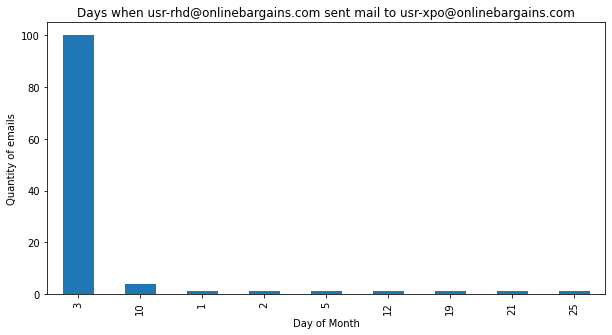

In [16]:
emailUserBar.plot(kind='bar', figsize=(10,5),title = "Days when usr-rhd@onlinebargains.com sent mail to usr-xpo@onlinebargains.com",
                 xlabel="Day of Month", ylabel="Quantity of emails")

This graph shows that through the month of August starting on the 1st and ending the 25th; usr-rhd sent nearly all of the emails to usr-xpo on the same day, the 3rd of August.
### Checking for email responses

<AxesSubplot:title={'center':'Top 50 email recipients of usr-xpo@onlinebargains.com in August'}, xlabel='Recipient', ylabel='Quantity of emails'>

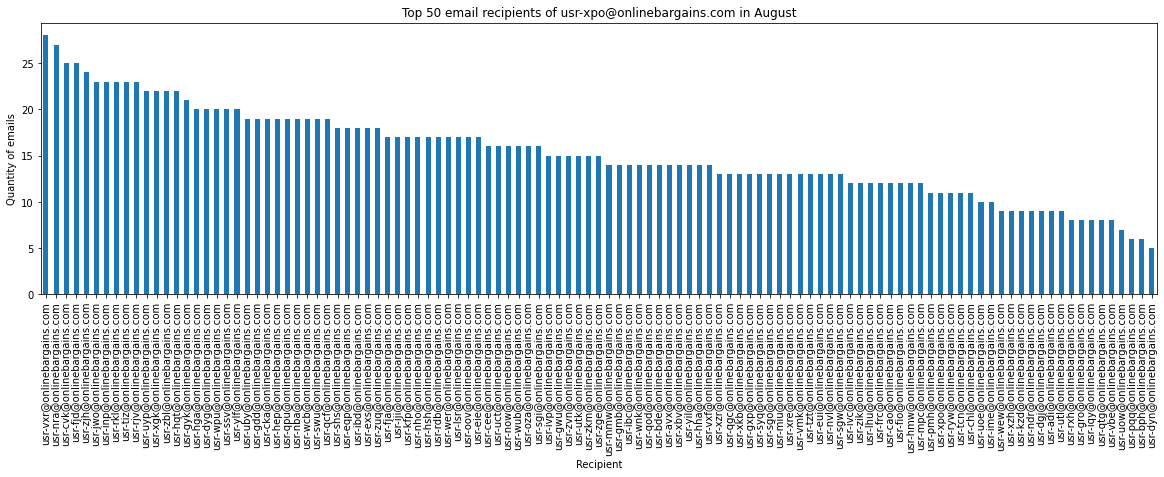

In [17]:
emailBar2.plot(kind='bar', figsize=(20,5),title = f"Top 50 email recipients of usr-xpo@onlinebargains.com in {anomMonth}",
               xlabel="Recipient", ylabel="Quantity of emails")

This graph shows usr-xpo's emails sent in August, as can be seen, they do not send a single response to usr-rhd.
### Email Data Conclusion
At first the email data anomolies were lost in the overall dataset, however, by filtering the data down to the identified parameters it became clear that usr-rhd was creating anomolous data. Over the course of August they had sent 111 emails to a single user "usr-xpo", this was followed up to see that 100 of these emails all came from the same day being the 3rd of August. After reviewing "usr-xpo", it was evident that they were not responding to the mass emails.
# Conclusion

After looking throughout the dataset, the Director role continually stands out as having anomolous data in the month of August. This all aligns with a single user account of "usr-rhd".
* Usr-RHD using USBs - The only director to do so
    - Dates of interest: 07/08/2020 -10/08/2020
* Usr-RHD accessing a unique file
    - /docs/clients
    - Date of interest: 05/08/2020
* Usr-RHD visiting new websites
    - http://www.legaleagle.com 
    - http://www.linkedin.com.
    - Date of interest: 10/08/2020
* Usr-RHD sending mass emails to a single user
    - usr-xpo@onlinebargains.com
    - Date of interest: 03/08/2020

# Supplementary graphs
The following is additional material which was created during the investigation. This is supportive in that it shows the highlighted material as being anomolous. Graphs in the main report will have been identified within a set of the graphs below, they can be used to view the remaining dataset.
### USB Data in across the data set for Directors

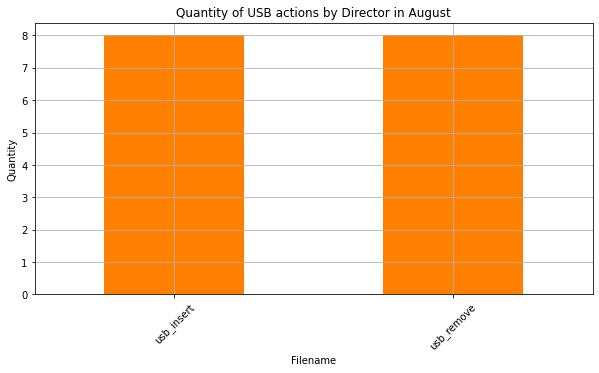

In [18]:
usbFilter = usb_data[usb_data['user'].isin(user_set[anomRole])]
usbFilter['month'] = usbFilter['datetime'].dt.month_name()
for i in usbFilter['month'].unique():
    usbFilter_temp = usbFilter[usbFilter['month']== i]
    usbBar = pd.value_counts(usbFilter_temp['action'])
    usbBar.plot(kind='bar',title= (f"Quantity of USB actions by {role} in {i}"), xlabel="Filename", ylabel='Quantity', color='#ff8000', rot=45, figsize=(10,5)).grid(True)
    plt.show()

This shows how Directors is using USBs in each month, this would show a series of graphs, however, due to Directors only using USBs in August, there is only one. The same set of graphs have been made for the remaining departments where it could be seen that all departments stay the same across the dataset apart from Directors.
### File Data in across the data set for Directors

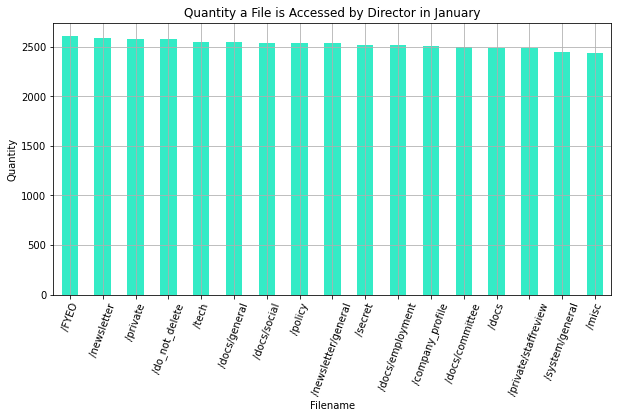

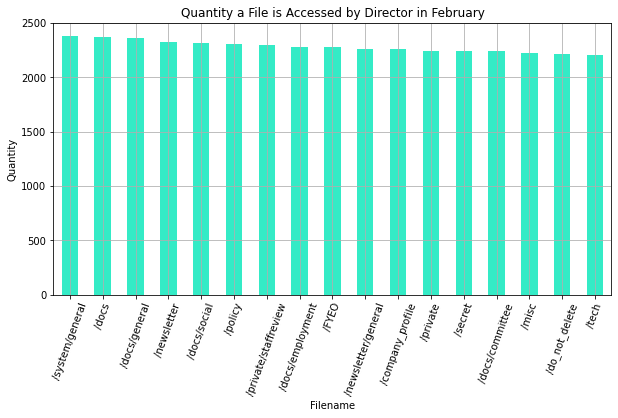

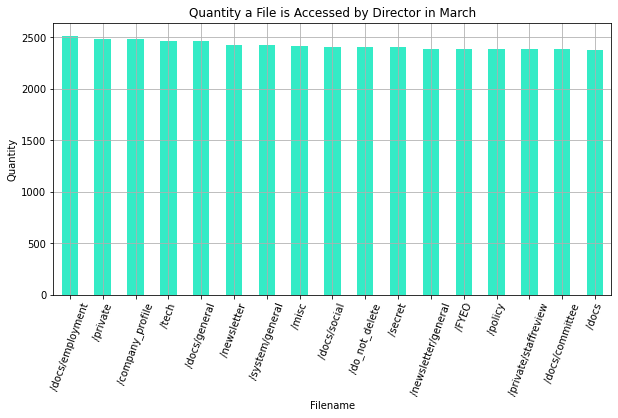

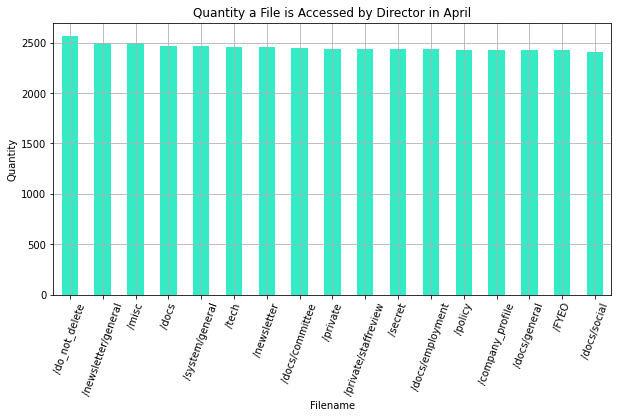

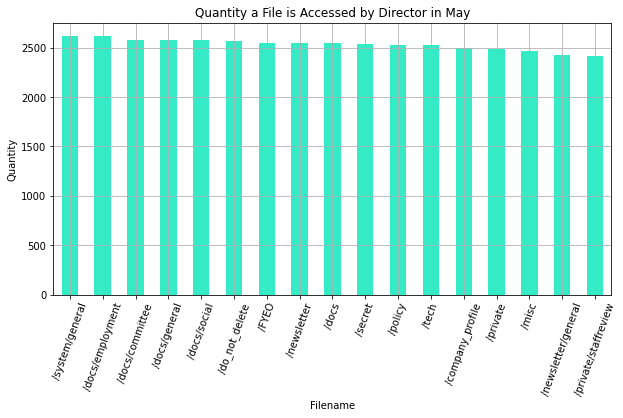

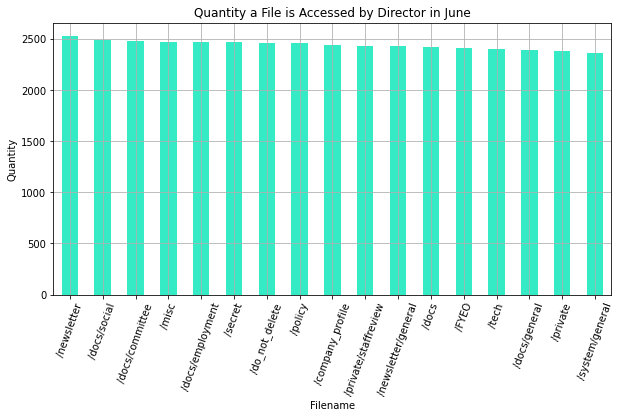

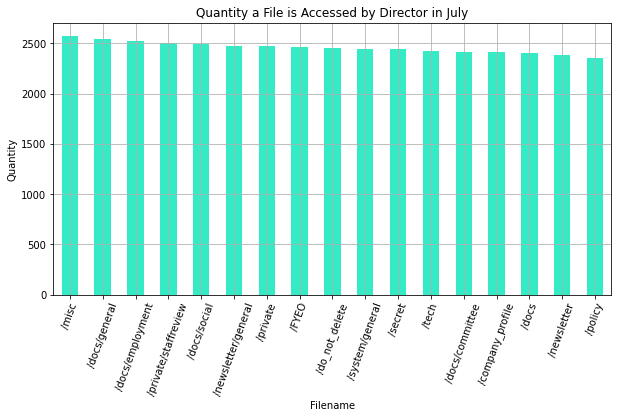

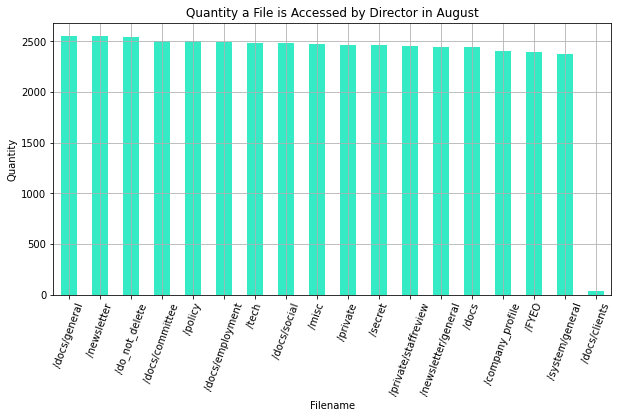

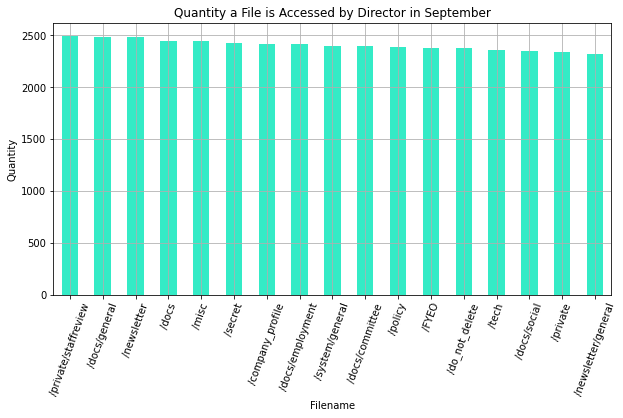

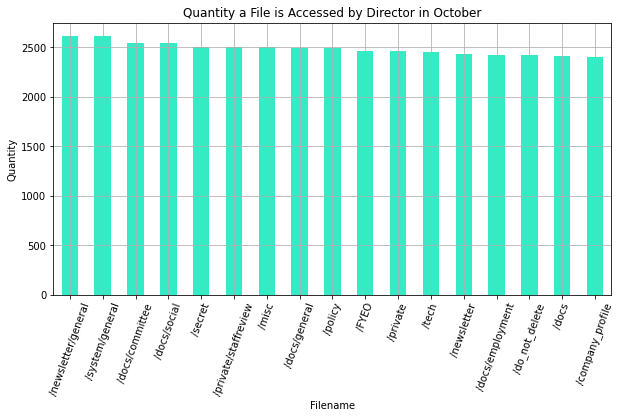

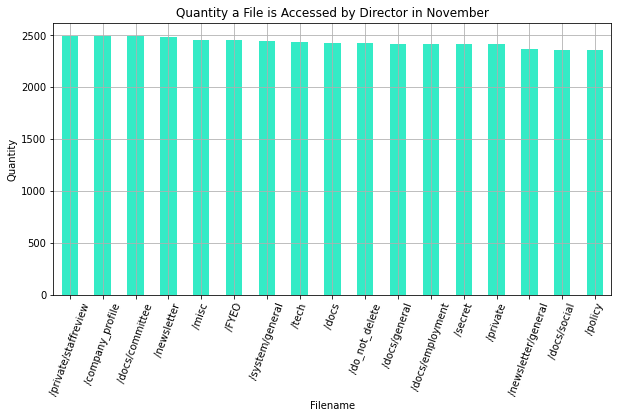

In [19]:
fileFilter = file_data[file_data['user'].isin(user_set[role])]
fileFilter['month'] = fileFilter['datetime'].dt.month_name()
for i in fileFilter['month'].unique():
    fileFilter_temp = fileFilter[fileFilter['month']== i]
    fileBar = pd.value_counts(fileFilter_temp['filename'])
    fileBar.plot(kind='bar',title= (f"Quantity a File is Accessed by {role} in {i}"), xlabel="Filename", ylabel='Quantity', color='#34ebc6', rot=70, figsize=(10,5)).grid(True)
    plt.show()

There appears to be an anomoly with the Technical role in that "/dev" is accessed considerably more frequently than all other files. However, this aligns with the role and comparing this month to all other months across the data set, this no longer appears as an outlier. There is also an anomoly in the Director role in August which has been explored further, partly in the below graphs. Comparing the file data across all roles in August shows that "/docs/clients" is only accessed by directors and no other job role.
### Web Data in across the data set for Directors

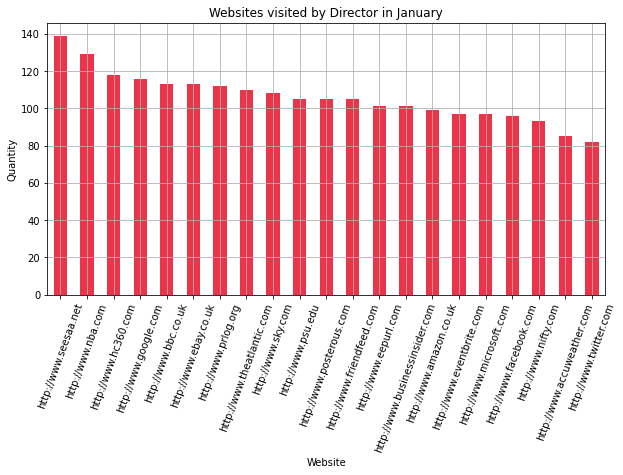

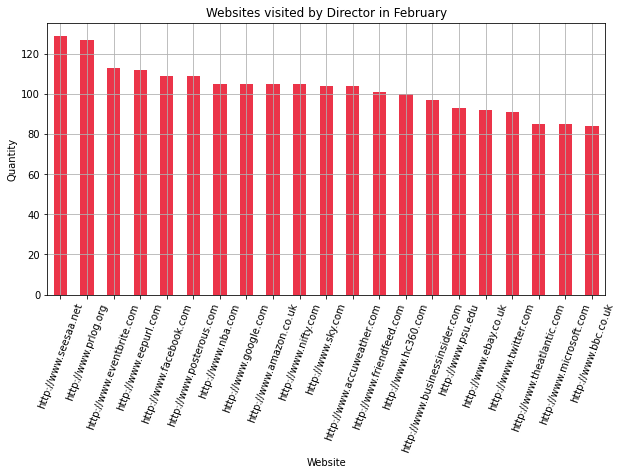

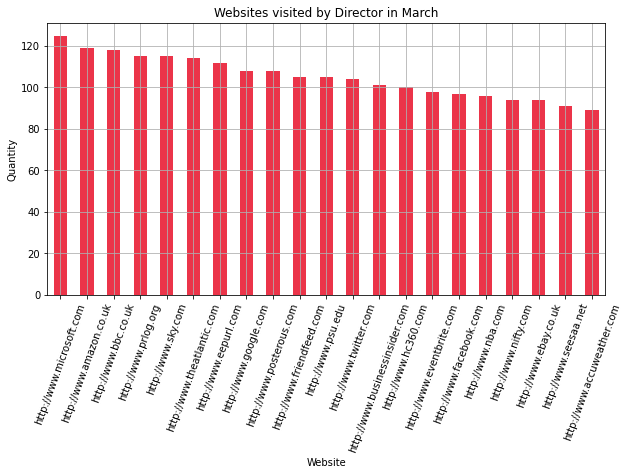

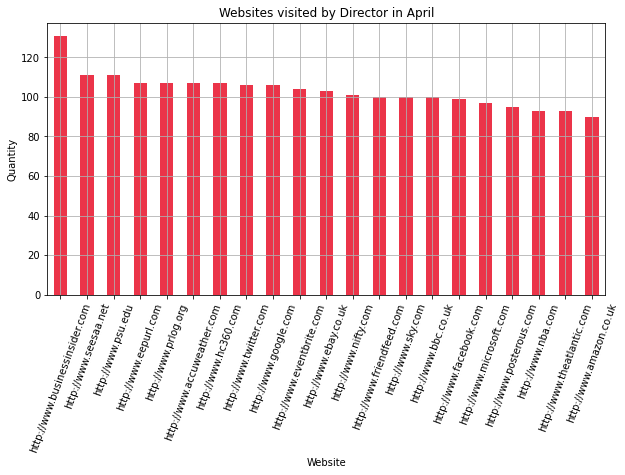

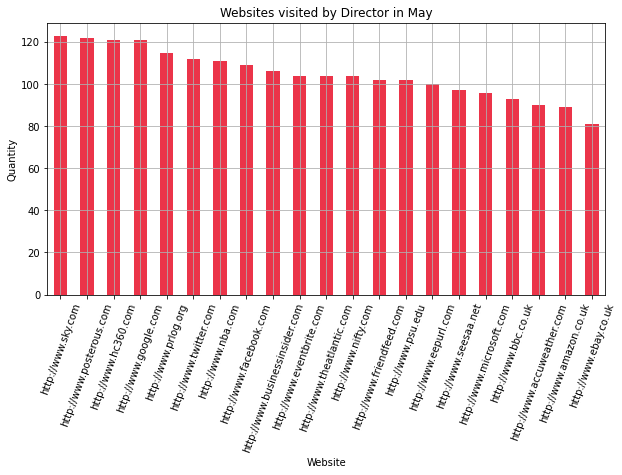

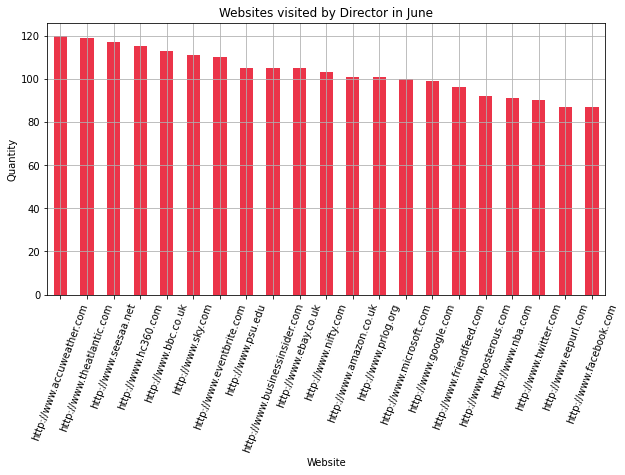

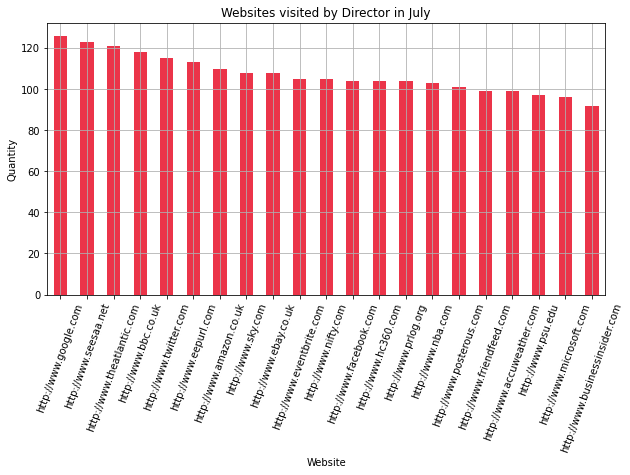

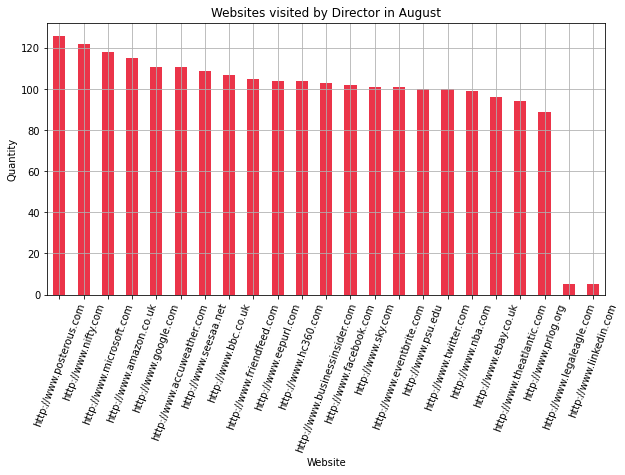

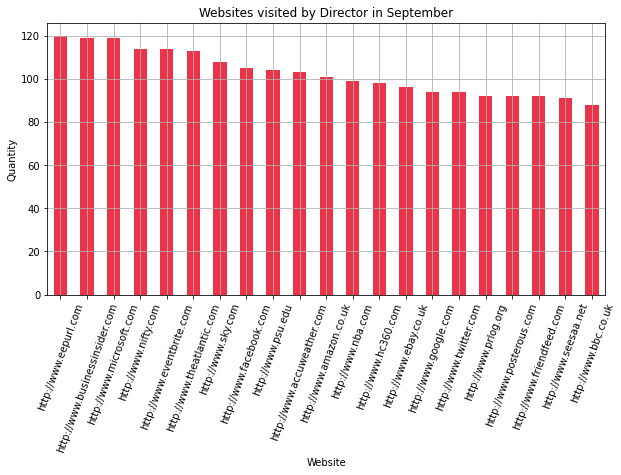

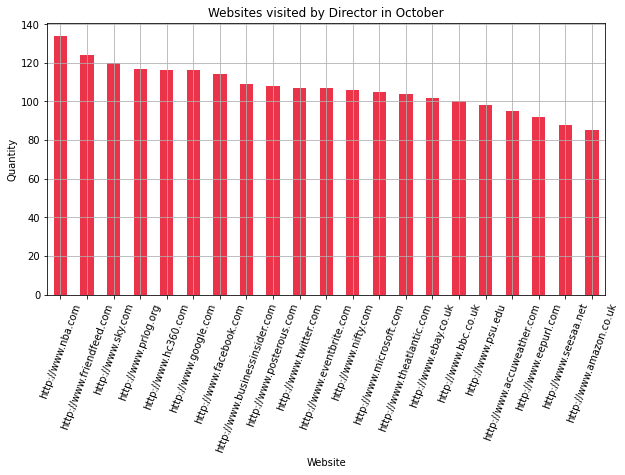

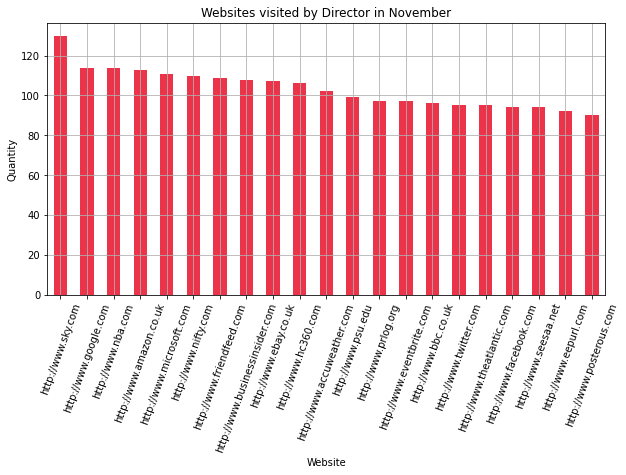

In [20]:
webFilter = web_data[web_data['user'].isin(user_set[anomRole])]
webFilter['month'] = webFilter['datetime'].dt.month_name()
for i in webFilter['month'].unique():
    webFilter_temp = webFilter[webFilter['month']== i]
    webChart = pd.value_counts(webFilter_temp['website'])
    webChart.plot(kind='bar',title= (f"Websites visited by {role} in {i}"), xlabel="Website", ylabel='Quantity', color='#eb3449', rot=70,figsize=(10,5)).grid(True)
    plt.show()

This set of graphs allows for an overview of the entire year for all roles and the websites that they are accessing. By scrolling through them it becomes clear that there is an anomoly in August, this can then be filtered down so that only the anomolous month is being analysed. This same graph was created for all remaining roles, this was to check whether other departments are accessing the two new websites which directors are. No other departments access http://www.legaleagle.com or http://www.linkedin.com
### Email Data in August for Directors

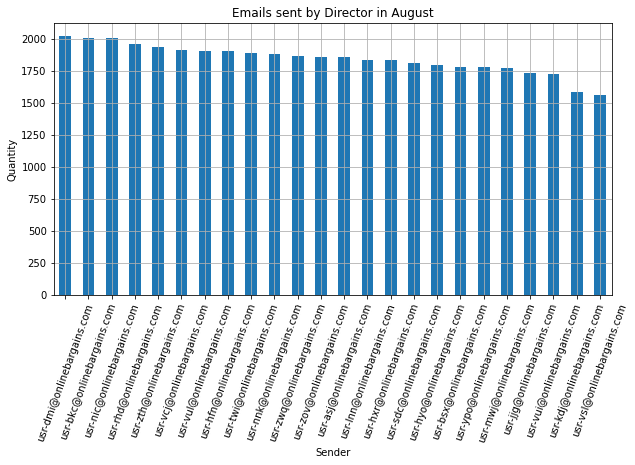

In [21]:
emailFilter = email_data[email_data['sender'].isin(user_set_emails[anomRole])]
emailFilter['month'] = emailFilter['datetime'].dt.month_name()
emailFilter_temp = emailFilter[emailFilter['month']== anomMonth]
emailChart = pd.value_counts(emailFilter_temp['sender'])
emailChart.plot(kind='bar',title= (f"Emails sent by {anomRole} in {anomMonth}"), xlabel="Sender", ylabel='Quantity', rot=70,figsize=(10,5)).grid(True)
plt.show()

Upon inspection, there does not seem to be any anomolies,this is due to the anomoly being lost in the size of the remaining data.
### Usr-RHD Email Data in across the data set

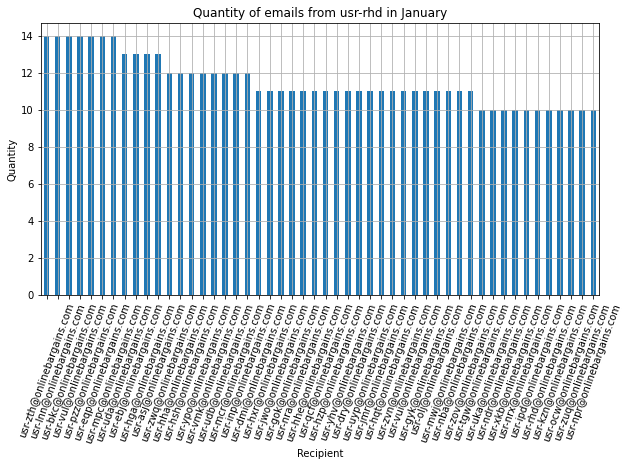

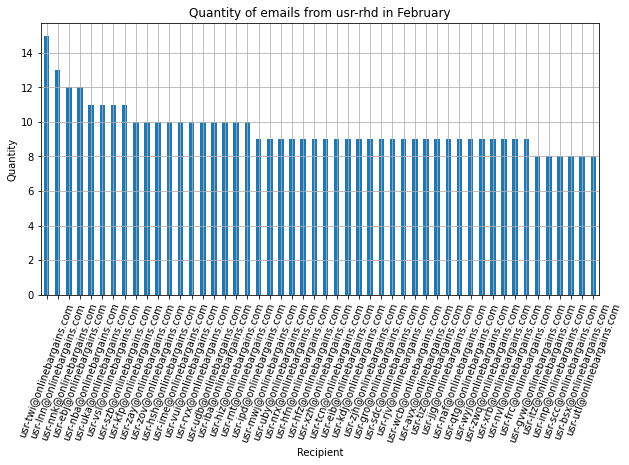

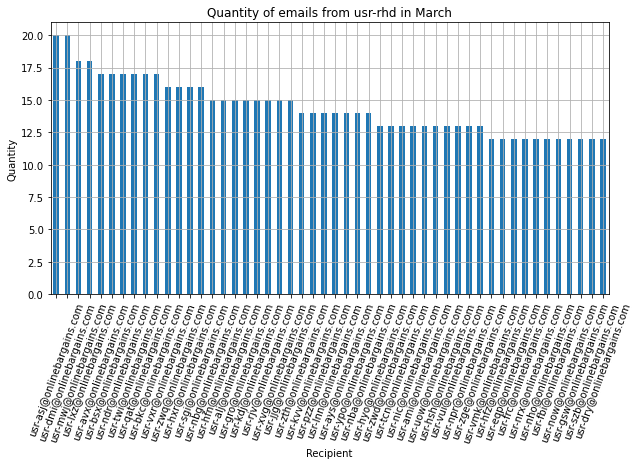

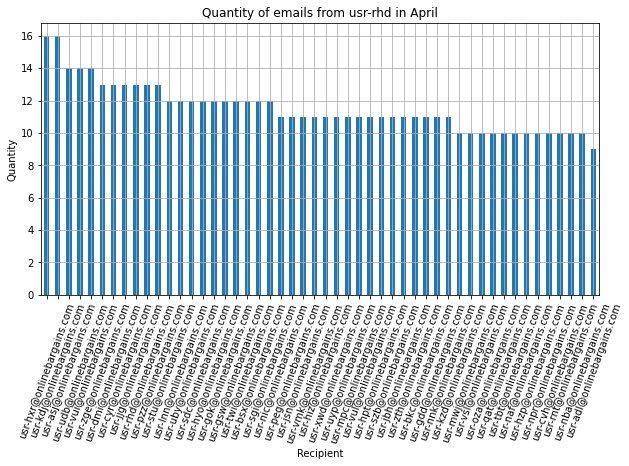

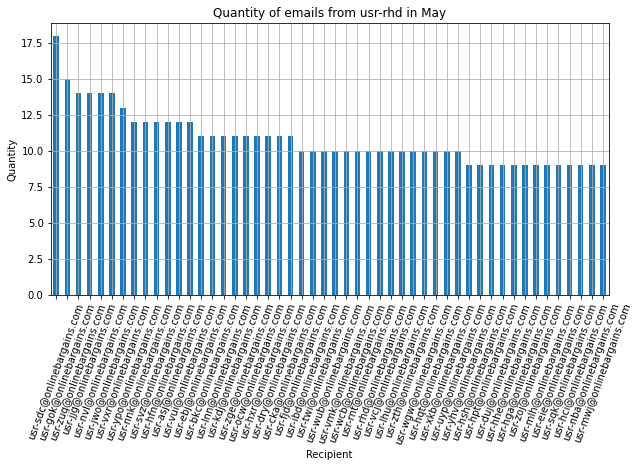

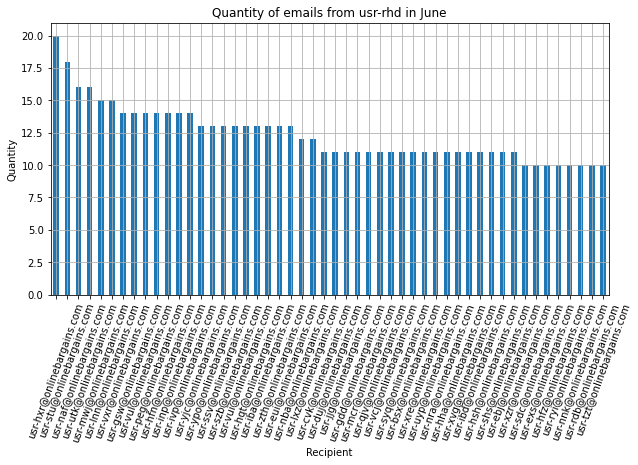

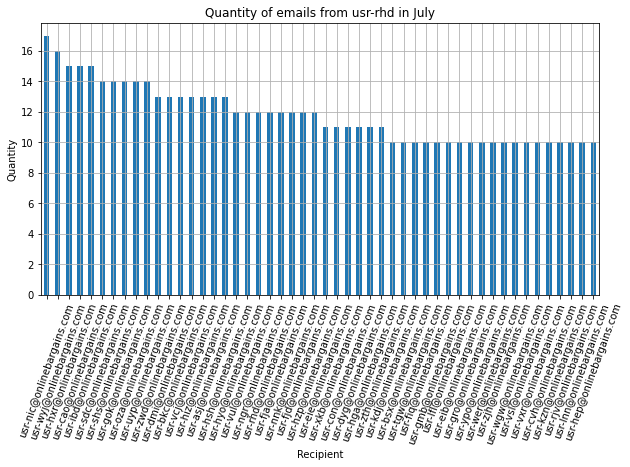

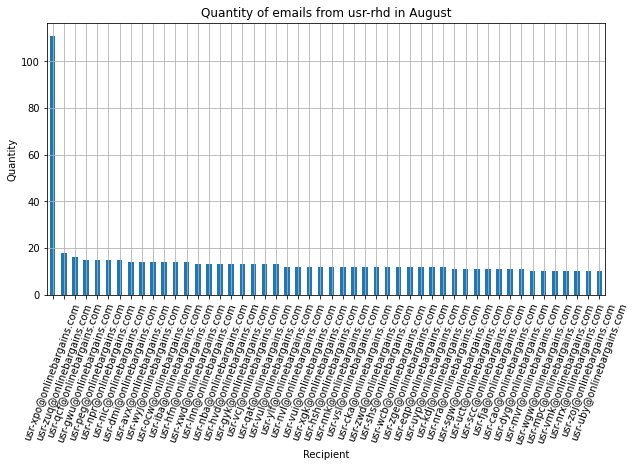

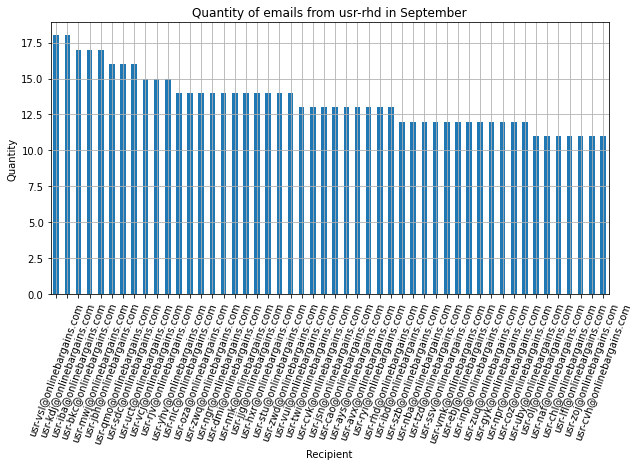

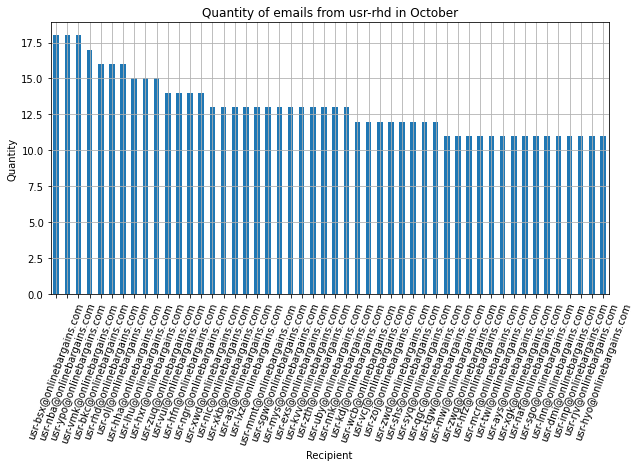

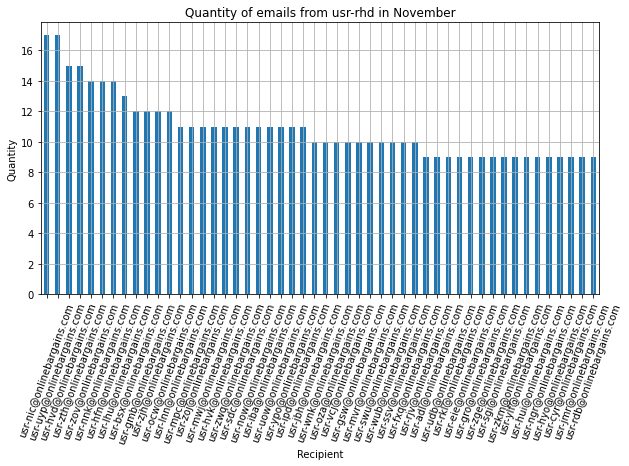

In [22]:
emailFilter =email_data[email_data['sender']=='usr-rhd@onlinebargains.com']
emailFilter['month'] = emailFilter['datetime'].dt.month_name()
for i in emailFilter['month'].unique():
    tempEmailFilter =emailFilter[emailFilter['month']==i]
    tempEmailFilter = pd.value_counts(tempEmailFilter['recipient'])[:50]
    tempEmailFilter.plot(kind='bar',title= (f"Quantity of emails from usr-rhd in {i}"), xlabel="Recipient", ylabel='Quantity',  rot=70, figsize=(10,5)).grid(True)
    plt.show()

Now by filtering down further to the specific user, it becomes evident that in August there in an anomoly, this aligns with the trend we have previously noted.